## TRABALHO GRUPO 3  - PROJ2
----
 * Airton Carneiro
 * Isabela Azevedo
 * João Pedro do Nascimento Sandolin
 * Leonardo Hiraiwa
 * Matheus Fanali Giraldes


# Organizando uma eleição
(créditos ao professor Rafael)

O último ano foi extremamente desafiador para você. Além de estarmos vivendo uma pandemia que aumentou nossa preocupação com a nossa própria vida e com nossos entes queridos e estarmos obrigados a passar mais tempo em casa para garantir nossa segurança, você se matriculou em um curso de programação e ciência de dados para mudar de rumo em sua carreira!

O _timing_ pareceu ideal: mais tempo em casa, mais tempo para estudar. Porém, você esbarrou em algumas dificuldades. O condomínio está em reforma, e você passa o dia ao som de marretadas no piso. Durante a noite, no horário da sua aula online, seus vizinhos - um casal passando por dificuldades na relação - costumam discutir em voz alta. A discussão deles frequentemente acorda o bebê do outro vizinho e todos os cachorros do andar no prédio. Deixar para estudar no final de semana não ajuda, pois o filho adolescente da família do apartamento logo acima do seu costuma trazer os colegas de banda para ensaiar. 

A situação se tornou insustentável, e o síndico - que é o mesmo senhorzinho desde que você se mudou para esse condomínio, há mais de 10 anos - não toma atitudes e não gosta de ser perturbado. Chegou a hora de organizar uma eleição para um novo síndico, e você tomou a iniciativa de montar um sistema eletrônico para auxiliar na votação.

## Entidades envolvidas

Podemos imaginar as seguintes entidades envolvidas na eleição:

* **Morador**: representa cada uma das pessoas que moram no prédio. Possui um nome, um Apartamento e é capaz de depositar um voto em um Candidato em uma Urna.
* **Candidato**: é um tipo especial de Morador. Possui tudo o que o morador possui, mas também possui um número que será usado para representá-lo na Urna e uma contagem individual de votos.
* **Apartamento**: representa cada uma das unidades do prédio. Possui uma lista de moradores e um status indicando se ele já votou ou não. Cada apartamento tem direito a exatamente 1 voto. Se a sua filha já votou, você não pode mais votar!
* **Urna**: coleciona votos. Ela possui uma coleção de candidatos e uma coleção de moradores (lembrando que o candidato também conta como morador!). Ela armazena a quantidade de votos de cada candidato e é capaz de incrementar essa quantidade ao receber um voto novo. Ela também possui uma coleção de apartamentos e é capaz de determinar quais apartamentos já votaram (mas não qual apartamento votou em cada candidato - o voto é secreto). Quando o último apartamento votar, ela publica os resultados e declara o vencedor.

Vamos pensar juntos em meios de implementar cada uma das classes.

### Morador

A classe mais básica de nossa eleição, representando cada uma das pessoas que habitam no condomínio. O morador obrigatoriamente possui um nome e um Apartamento.

Seu construtor pode ou não receber uma string contendo o nome, e pode ou não receber um objeto Apartamento. Caso ele não receba um nome, deverá solicitar a digitação de um através do input. Caso ele não receba um objeto Apartamento, deverá pedir por input o número do apartamento e criar o objeto.

O nome e apartamento digitados ou recebidos deverão se tornar atributos do objeto.

Nosso objeto também deverá possuir um método para votar. Ele deverá receber um objeto Urna e pode receber um número inteiro correspondente ao número de um candidato ou, caso não receba, irá ler o número pelo teclado. Ela deverá primeiro verificar se o seu apartamento já votou, e caso não tenha, ela irá chamar o método de acrescentar voto na Urna, informando o número de seu candidato e passando seu objeto apartamento. Caso contrário, ela exibirá uma mensagem alertando que esse apartamento já votou.

In [66]:
class Morador():
    '''
    Cria uma representação da entidade
    Morador de nosso condomínio
    ''' 
    def __init__(self, idade, apartamento=None, nome=None):
        '''
        Construtor

        Parâmetros
        -----------
        nome: str (opcional)
            Nome associado a pessoa
        idade: int
            idade da pessoa
        apartamento: obj Apartamento
            Apartamento da pessoa
        
        ''' 
        # se nome não for informado, solicitar via Input
        if nome == None:
            nome = input('Digite o nome do morador:')
            if nome == '':
                raise TypeError("O nome não pode ser vazio.")

        # se o apartamento não for informado, solicitar via Input
        if apartamento == None:
            numero_apto = input('Digite o número do apartamento: ')
            if numero_apto not in [apt.numero_apto for apt in Apartamento.lista_condominio]:
                apartamento = Apartamento(numero_apto)
            else:
                for apt in Apartamento.lista_condominio:
                    if apt.numero == numero_apt:
                        apartamento = apt

        # verificação de tipos
        if not isinstance(nome, str):
            raise TypeError("O nome deve ser uma string.")
        if not isinstance(idade, int):
            raise TypeError("A idade deve ser um número inteiro.")
        if not isinstance(apartamento, Apartamento):
            raise TypeError("Digite um apartamento válido.")
                
        # criando atributos
        self.nome = nome.title()
        self.idade = idade
        self.apartamento = apartamento

        # atributo não passados no construtor    
        self.voto = False # False se não votou, ou True se já votou
        
        # verificando duplicidade de moradores a partir do nome
        if self.nome not in [morador.nome for morador in self.apartamento.moradores]:
            self.apartamento.moradores.append(self)
        else:
            raise AttributeError("Morador já está no apartamento!")

    #================================================================================================================
    ## Métodos mágicos
    
    def __repr__ (self):
        return f'{self.nome}'

    #================================================================================================================
    ## Métodos públicos
    
    def votar(self, urna, num_candidato=None):
        '''
        Método para votar

        Parâmetros
        ----------
        urna: obj Urna
        num_candidato: int (opcional)
        '''
        # Executa o método 'receber_voto' da classe Urna
        urna.receber_voto(self.apartamento, num_candidato)
        

### Candidato

Objetos da classe Candidato são, necessariamente, moradores. Eles possuem as mesmas informações e as mesmas ações que um morador. O que isso significa em programação orientada a objeto?

Ele possui outros dois atributos: o seu número que será usado para identificá-lo na Urna e sua contagem de votos. Ambos devem ser inicializados com valor 0. 

Ele deve oferecer métodos para que seu número seja configurado (quando cadastrarmos o candidato na Urna, ela irá fornecer um número para ele), bem como para que sua contagem de votos seja atualizada (ao final da votação, a Urna irá atualizar a contagem de todos os candidatos).

In [67]:
class Candidato(Morador):
    '''
    Cria uma representação da entidade
    Candidato de nosso condomínio
    '''

    def __init__(self, idade, apartamento, nome=None):
        '''
        Construtor

        Parâmetros
        ----------
        nome: str (opcional)
                Nome associado a pessoa
        idade: int
                idade da pessoa
        apartamento: obj Apartamento
                Apartamento da pessoa
        '''
    
        super().__init__(idade, apartamento, nome)

        # atribui o número da cédula ao candidato
        self.__numero = 0

        self.__contagem_votos = 0
        
        for morador_apt in apartamento.moradores:
            if isinstance(morador_apt, Candidato) and morador_apt is not self:
                raise TypeError('Já existe um candidato no apartamento')
            
        # verificando duplicidade de moradores a partir do nome
        if self.nome not in [morador.nome for morador in self.apartamento.moradores]:
            self.apartamento.moradores.append(self)

    #================================================================================================================
    ## 'Getters'
    
    @property
    def numero(self):
        # atributo privado pois o usuário não deve mudar o número do candidato
        return self.__numero
    
    #----------------------------------------------------------------------------------------------------------------
    
    @property
    def contagem_votos(self):
        # atributo privado pois o usuário não deve mudar a contagem de votos
        return self.__contagem_votos
    
    #================================================================================================================ 
    ## Métodos mágicos
    
    def __repr__ (self):
        return f'{self.nome} possui o número {self.numero}' 
    
    #================================================================================================================
    ## Métodos privados

    def _cadastrar_numero(self, numero):
        # cadastra o número do candidato
        # será utilizado apenas pela urna
        self.__numero = numero

    #------------------------------------------------------------------------------------------------------------------
    
    def _atualizar_contagem(self):      
        # Atualiza a contagem de votos
        # será utilizado apenas pela urna
        self.__contagem_votos += 1 
        
    #------------------------------------------------------------------------------------------------------------------
    
    def _zerar_contagem_votos(self):
        # zera a contagem de votos do candidato
        # será utilizado apenas pela urna
        self.__contagem_votos = 0
    

### Apartamento

Objetos da classe Apartamento irão agregar objetos Morador. Isso significa que um de seus atributos será uma lista de moradores. Quando um Apartamento é criado, sua lista começará vazia. O Apartamento deve oferecer métodos para adicionar moradores novos (recebe um objeto Morador e adiciona à lista) e para visualizar seus moradores.

Cada apartamento tem direito a exatamente um voto na eleição para síndico. Portanto, cada objeto também deve ter um atributo indicando se aquele apartamento já votou ou não. A classe deve fornecer meios para que a esse atributo possa ser atualizado, pois quando um morador votar, a urna irá alterar esse atributo registrando que o apartamento já votou.

In [91]:
class Apartamento():
    '''
    Cria uma representação da entidade
    Apartamento
    '''
    lista_condominio = []
    def __init__(self, numero_apto):
        '''
        Construtor

        Parâmetro
        ---------
        numero_apto: int
            número do apartamento
        '''
        
        self.numero_apto = numero_apto
        if self.numero_apto not in [apt.numero_apto for apt in self.lista_condominio]:
            # como apartamento é novo, definir com nenhum morador
            self.moradores = []
            # e que ninguém ainda votou
            self.__voto = False

            self.lista_condominio.append(self)
        else:
            raise AttributeError('Apartamento já existe.')
    #========================================================================================================
    ## 'Getters'
    
    @property
    def voto(self):
        return self.__voto
    
    #========================================================================================================
    ## Métodos mágicos
    
    def __repr__(self):
        return f'Apartamento {self.numero_apto}'

    #========================================================================================================
    ## Métodos privados
    
    def _votar(self):
        '''
        Altera o atributo '__voto' do apartamento para True, indicando que o apartamento efetuou o voto
        '''
        self.__voto = True
     
    #--------------------------------------------------------------------------------------------------------
    
    def _finalizar_votacao(self):
        self.__voto = False    
    
    #========================================================================================================
    ## Métodos públicos
    
    # Não será criada uma função para adicionar moradores ao apartamento
    # isso será feito no instanciamento dos moradores
    
    def vizualizar_moradores(self):
        '''
        Imprime a lista de moradores 
        caso exista um candidato no apartamento, informa seu nome
        '''
        print(f'Apartamento {self.numero_apto}\nMoradores: {self.moradores}')
        
        for morador in self.moradores:
            if isinstance(morador, Candidato):
                print(f'Candidato: {morador.nome}')
                break


### Urna
A classe mais complexa do projeto. Ela é responsável por boa parte da lógica da nossa eleição.

Seu construtor deverá criar como atributos uma coleção de apartamentos e outra de candidatos - escolha a estrutura de dados que julgar mais adequada.

A classe deve fornecer métodos que permitam o cadastro de apartamentos (recebendo como parâmetro objetos Apartamento já existentes) e candidatos (idem). Ao receber um candidato para cadastro, ela deverá gerar um número **único** para representar esse candidato na eleição e irá ajustar esse atributo diretamente no objeto candidato.

Ela também deve ter um método para receber um voto, que deve receber um objeto apartamento e o número de um candidato. Ela deve atualizar a contagem de voto do candidato cujo número foi recebido, e marcar aquele apartamento como já votado. Se o apartamento que votou era o último que ainda podia votar, a urna deve imediatamente imprimir os resultados.

Bole uma maneira que a urna possa sinalizar para o programa principal se ela já encerrou a votação ou não.

In [1]:
class Urna():
    '''
    Cria uma representação da entidade
    Urna da nossa eleição
    '''
    numero_votacao = [0]
    
    def __init__(self, apartamentos=None, candidatos=None):
        '''
        Construtor

        Parâmetros
        ----------
        apartamentos: list
        lista de objetos do tipo 'Apartamento'

        candidatos:list
        lista de objetos do tipo 'Candidatos'
        '''
        self.numero_votacao[0] += 1
        
        if apartamentos is None:
            # apartamento vazio
            apartamentos = []
        else:
            for apartamento in apartamentos:
                # verifica apartamentos
                if not isinstance(apartamento, Apartamento):
                    raise TypeError('Argumento "apartamentos" deve receber apenas objetos do tipo "Apartamento"')
    
        # Cria o atributo 'apartamento' como um dicionário com duas chaves:
        ## 'obj': lista de objetos do tipo apartamentos
        ## 'status_voto': lista de booleanos. False se não votou, True se votou (inicializa todos como False)
        self.apartamentos = {chave:valor for chave,valor in \
        list(zip(['obj','status_voto'], (apartamentos, [False]*len(apartamentos))))}
        
        self.candidatos = []
        if candidatos is not None:
            for candidato in candidatos:
                # verifica candidatos
                if not isinstance(candidato, Candidato):
                    raise TypeError('Argumento "candidatos" deve receber apenas objetos do tipo "Candidato"')
                self.cadastrar_candidato(candidato)
                
        for candidatos in self.candidatos:
            candidato._zerar_contagem_votos()
    #========================================================================================================
    ## Métodos mágicos
    
    def __repr__(self):
        return f'Urna da {self.numero_votacao[0]}ª votação do condomínio'
    
    #================================================================================================================
    ## Métodos Privados:
    
    def __verificar_numero(self, numero):
        # verifica um número, retorna True se nenhum candidato possiu o número False caso contrário
        for candidato in self.candidatos:
            # verifica se numero aleatório é igual ao de algum candidato
            if numero == candidato.numero:
                return False
        return True
        
        
    #-----------------------------------------------------------------------------------------------------------------
    
    def __gerar_numero_candidato(self):
        # Gera um número aleatório, ao qual nenhum candidato está associado
        while True:
            numero = random.randint(1, 100)
            if self.__verificar_numero(numero): # verifica se já existe um candidato com este número
                return numero
            
        
    #-----------------------------------------------------------------------------------------------------------------
    
    def __fazer_grafico_votacao(self, parcial=False):
        candidatos = [candidato.nome for candidato in self.candidatos ]
        votos = [candidato.contagem_votos for candidato in self.candidatos ]
        plt.bar(candidatos, votos)
        if parcial:
            txt_parcial = 'parcial'
        else:
            txt_parcial = ''
        plt.title(f'Resultado {txt_parcial} das eleições')
        plt.xlabel('Candidatos')
        plt.ylabel('Votos')
        
    #================================================================================================================
    ## Métodos públicos:
    
    def cadastrar_apartamento(self, apartamento):
        '''
        Cadastrar apartamento na Urna

        Parâmetros
        ----------
        apartamento: obj Apartamento
            Apartamento da pessoa
        '''
        if apartamento not in self.apartamentos['obj'] and isinstance(apartamento, Apartamento):
            self.apartamentos['obj'].append(apartamento)
            self.apartamentos['status_voto'].append(False)    
            #self.apartamentos_pendente.append(apartamento)
            print(f'Apartamento {apartamento} cadastrado na urna.')
        else:
            print('Apartamento já está cadastrado!')

    #-----------------------------------------------------------------------------------------------------------------

    def cadastrar_candidato(self, candidato):
        '''
        Cadastra um candidato na urna

        Parâmetro
        ---------
        candidato: obj Candidato
            candidato à ser cadastrado na urna
        '''
        if candidato not in self.candidatos and isinstance(candidato, Candidato):
            candidato._cadastrar_numero(self.__gerar_numero_candidato())
            candidato._zerar_contagem_votos()
            self.candidatos.append(candidato)
            print(f'Candidato {candidato.nome} cadastrado na urna. Seu número é {candidato.numero}')
        else:
            print('Candidato já está cadastrado!')

    #-----------------------------------------------------------------------------------------------------------------   

    def receber_voto(self, apartamento, nro_candidato=None):
        '''
        Verifica se o apartamento votou e atribui um voto

        Parâmetros
        ----------
        apartamento : obj Apartamento
            Apartamento da pessoa
        '''
        # Verificando se a eleição já foi finalizada
        if all(self.apartamentos['status_voto']):
            print("Não é mais permitido votar! Eleição já foi finalizada.")
            return
            
        # Realiza uma dupla verificação para determinar se apartamento já votou 
        if (apartamento.voto) or (self.apartamentos['status_voto'][self.apartamentos['obj'].index(apartamento)]):
            print("Apartamento já votou")
            return
        
        # pede para o usuário digitar um número caso não tenha escolhido o candidato
        if nro_candidato is None:
            for candidato in self.candidatos:
                #Apresenta lista de candidatos com os números
                print(f"Nome:{candidato.nome}\tNúmero:{candidato.numero}") 
            nro_candidato = int(input("Digite o número do seu candidato: "))
            while (self.__verificar_numero(nro_candidato)):
                nro_candidato = int(input("Número inválido! Digite novamente o número do seu candidato: "))
               
        apartamento._votar()
        self.apartamentos['status_voto'][self.apartamentos['obj'].index(apartamento)] = True

        for candidato in self.candidatos:
            if candidato.numero == nro_candidato:
                candidato._atualizar_contagem()

        if all(self.apartamentos['status_voto']):
            print("Votação finalizada!")
            self.__fazer_grafico_votacao()
            
            for apt in self.apartamentos['obj']:
                apt._finalizar_votacao()
    #-----------------------------------------------------------------------------------------------------------------

    def mostrar_votacao_parcial(self):
        print(f"Resultado parcial: ({self.apartamentos['status_voto'].count(True)/len(self.apartamentos['status_voto'])*100:.02f}% concluído)")
        
        self.__fazer_grafico_votacao(parcial=True)
        
        print(f"Restam {self.apartamentos['status_voto'].count(False)} votos")
        

In [9]:
urna = Urna()
urna

Urna da 8ª votação do condomínio

## O programa principal

Seu programa principal terá 3 etapas - fique à vontade para modularizar essas etapas com o auxílio de funções, ou mesmo utilizar outras classes se julgar necessário.

* Cadastro: o programa deverá ler informações sobre cada pessoa e ir criando os objetos Morador/Candidato e Apartamento correspondentes. Lembre-se de sempre perguntar se a próxima pessoa a ser lida é ou não candidata para decidir a melhor forma de instanciá-la no sistema.

* Configuração: o programa deverá utilizar as informações obtidasna etapa anterior para criar uma urna.

* Votação: o programa ficará em loop permitindo que diferentes moradores votem (ou tentem votar). Nessa etapa, o programa deve ser capaz de identificar qual o morador votando e utilizar os métodos criados previamente para realizar o voto. Quando a classe Urna informar que a votação acabou, o loop deve ser encerrado.

## Dicas

* Métodos mágicos: no mínimo uma _representação imprimível_ dos objetos de cada classe seria desejável para facilitar a sua vida. No caso de um morador, podemos imprimir seu nome e número do apartamento. No caso de um candidato, poderíamos incluir o número da urna. No caso do apartamento, seria legal imprimir todos os moradores. E no caso da urna, podemos ter dois casos: antes da votação acabar, apenas a lista de apartamentos que já votou deveria ser impressa. Após o término da votação, ela deveria imprimir quantos votos cada candidato recebeu e qual deles venceu.

* Arquivos e testes: note que vocês sempre foram orientados a passar dados por parâmetros **ou** digitá-los. Se você bolar um esquema inteligente com arquivos em formato padronizado (como CSV) e organizar direitinho seu programa principal, você consegue gerar um único arquivo com todos os moradores e suas respectivas informações (número do apartamento, se é ou não candidato e em quem gostaria de votar) e automatizar completamente as etapas do seu programa.

* Segurança adicional: atualmente, cada apartamento armazena a informação se já votou ou não. Mas e se o apartamento pudesse alterar essa informação e enganar a urna? Você pode colocar uma camada redundante de segurança fazendo com que a urna TAMBÉM controle quais apartamentos já votaram. Mesmo que o apartamento diga que não votou, se a urna está registrando que ele votou, então um hipotético segundo voto deve ser recusado. Veja se consegue pensar em outras possíveis falhas de segurança em potencial no programa. Lembre-se sempre de pensar do ponto de vista de uma classe e "desconfiar" das outras.

* Criatividade: os enunciados trazem o **mínimo** que você precisa fazer para que o seu programa funcione como foi planejado. Isso não impede que você crie outros métodos, acrescente informações que possam ser úteis e até mesmo crie outras classes para modelar melhor outros fatores que poderiam ser considerados na organização da sua eleição.


# CADASTROS
____

In [70]:
import csv
import random
import matplotlib.pyplot as plt

## Cadastrando Moradores e Candidatos
Serão cadastrados:
* 7 apartamentos
- Apt 100 (3 moradores)
- Apt 101 (2 moradores sendo 1 candidato)
- Apt 102 (1 morador)
- Apt 103 (1 morador)
- Apt 201 (2 moradores e 1 candidato)
- Apt 202 (1 morador que é candidato)
- Apt 203 (1 morador)

In [71]:
print('REALIZANDO O CADASTRO DE MORADORES E CANDIDATOS')

# lista contendo os apartamentos, moradores e candidatos
main_lista_aptos = []
main_lista_moradores = []
main_lista_candidatos = []
# Abre o arquivo
with open('media/bd_moradores_candidatos.csv',"r",encoding="utf-8") as arquivo:
    # variável temporária que armazena o número do apt
    # serve para garantir que não criará outra instância
    # de apartamento
    ultimo_nr_apt = 0
    for linha in arquivo:
        # atribui os valores às variáveis
        nr_apt, nm_morador, idade, bool_ehCandidato = linha.rstrip("\n").split(',')

        if ultimo_nr_apt != nr_apt:
            # instanciando apartamento
            apartamento = Apartamento(int(nr_apt))
            # armazenando na lista
            main_lista_aptos.append(apartamento)
            # recebendo novo valor para o número do apartamento
            ultimo_nr_apt = nr_apt

            print(f'\nCriando apartamento nr. {nr_apt}')

        # instanciando candidato
        if bool_ehCandidato == 'S':
            main_lista_candidatos.append(Candidato(idade=int(idade), apartamento=apartamento, nome=nm_morador))
            
            print(f'Candidato {nm_morador} cadastrado no apartamento')
        # instanciando morador
        else:
            main_lista_moradores.append(Morador(idade=int(idade), apartamento=apartamento, nome=nm_morador))

            print(f'Morador {nm_morador} cadastrado ao apartamento')

REALIZANDO O CADASTRO DE MORADORES E CANDIDATOS

Criando apartamento nr. 100
Morador João de Barro cadastrado ao apartamento
Morador Joana de Barro cadastrado ao apartamento
Morador Joãozinho de Barro cadastrado ao apartamento

Criando apartamento nr. 101
Candidato Terezinha de Jesus cadastrado no apartamento
Morador Jesus da Terezinha cadastrado ao apartamento

Criando apartamento nr. 102
Morador Adamastor Pitaco cadastrado ao apartamento

Criando apartamento nr. 103
Morador Espanta cadastrado ao apartamento

Criando apartamento nr. 201
Candidato Machado de Assis cadastrado no apartamento
Morador Elvira Fonseca cadastrado ao apartamento

Criando apartamento nr. 202
Candidato Cora Coralina cadastrado no apartamento

Criando apartamento nr. 203
Morador Eça de Queiroz cadastrado ao apartamento


In [77]:
apt_99 = Apartamento(99)
apt_98 = Apartamento(98)


apt_98.lista_condominio

[Apartamento 99, Apartamento 98]

#### Testando cadastrar um apartamento já existente

In [7]:
_ = Apartamento(int(nr_apt))

AttributeError: Apartamento já existe.

#### Testando cadastrar um morador já existente

In [8]:
_ = Morador(idade=int(idade), apartamento=apartamento, nome=nm_morador)

AttributeError: Morador já está no apartamento!

## Realizando os votos

In [9]:
def escolher_aleatoriamento_nro_canditato_para_votar():
    '''
    Método que retorna o número aleatoriamente de um dos candidatos

    Retorno: Número do candidato (int)
    '''
    nros_candidatos = [candidato.numero for candidato in main_lista_candidatos]
    return nros_candidatos[random.randint(0, len(nros_candidatos)-1)]

#### Cadastrando apartamentos e moradores na urna

In [10]:
urna = Urna(main_lista_aptos, main_lista_candidatos)

Candidato Terezinha De Jesus cadastrado na urna. Seu número é 38
Candidato Machado De Assis cadastrado na urna. Seu número é 72
Candidato Cora Coralina cadastrado na urna. Seu número é 59


#### Testando cadastrar o mesmo apartamento na urna

In [11]:
urna.cadastrar_apartamento(main_lista_aptos[0])

Apartamento já está cadastrado!


#### Testando cadastrar o mesmo candidato na urna

In [12]:
urna.cadastrar_candidato(main_lista_candidatos[0])

Candidato já está cadastrado!


#### Listando os candidatos que estão na urna

In [13]:
# realizando o unpacking da lista para imprimir cada candidato em uma linha (\n) em uma list comprehension
print(*(candidato_da_urna for candidato_da_urna in urna.candidatos), sep='\n')

Terezinha De Jesus possui o número 38
Machado De Assis possui o número 72
Cora Coralina possui o número 59


#### Realizando voto pela classe Morador

In [14]:
# Realizando o voto através da instância do morador
main_lista_moradores[0].votar(urna, escolher_aleatoriamento_nro_canditato_para_votar())

#### Realizando voto pela classe Urna

In [15]:
urna.receber_voto(main_lista_aptos[1], escolher_aleatoriamento_nro_canditato_para_votar())
urna.receber_voto(main_lista_aptos[2], escolher_aleatoriamento_nro_canditato_para_votar())

#### Exibindo a parcial da votação

Resultado parcial: (42.86% concluído)
Restam 4 votos


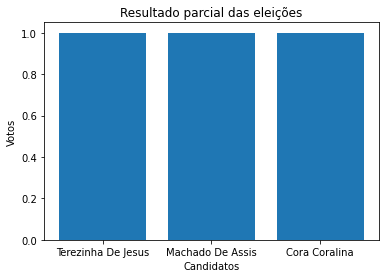

In [16]:
urna.mostrar_votacao_parcial()

#### Testando fazer uma pessoa votar quando alguém do mesmo apartamento já votou

In [17]:
main_lista_moradores[1].votar(urna, escolher_aleatoriamento_nro_canditato_para_votar())

Apartamento já votou


#### Computando voto manual

In [18]:
urna.receber_voto(main_lista_aptos[3])

Nome:Terezinha De Jesus	Número:38
Nome:Machado De Assis	Número:72
Nome:Cora Coralina	Número:59
Digite o número do seu candidato: 72


### Computando os votos dos apartamentos que ainda não votaram e a URNA reconhecendo que não tem mais ninguém para votar e anunciando o vencedor

Votação finalizada!


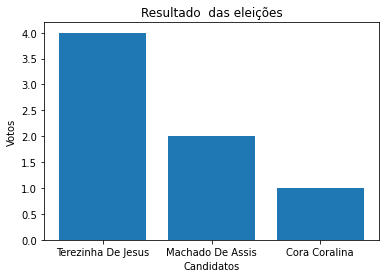

In [19]:
for apt in [apartamento for count,apartamento in enumerate(urna.apartamentos['obj']) if urna.apartamentos['status_voto'][count] is False]:
    nr_candidato = escolher_aleatoriamento_nro_canditato_para_votar()
    urna.receber_voto(apt, nr_candidato)

In [20]:
# implementar tentativa de voto quando votação já foi finalizada
urna.receber_voto(main_lista_aptos[0], escolher_aleatoriamento_nro_canditato_para_votar())

Não é mais permitido votar! Eleição já foi finalizada.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3100c8ab-d3d4-499c-acd3-56b86fb248b1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>